<a href="https://colab.research.google.com/github/btrosso/TensorFlow_Learning/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variable, even shorter....predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.14.0


# Creating some data to view and fit

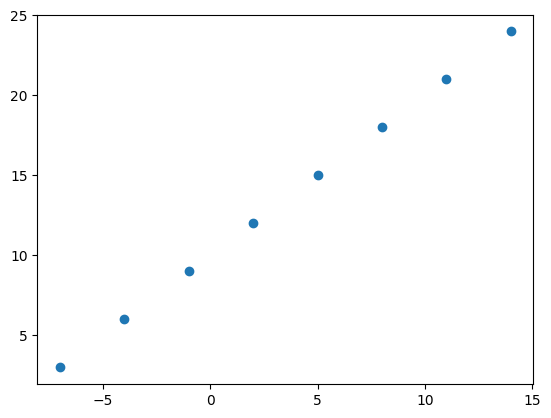

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (inputs)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

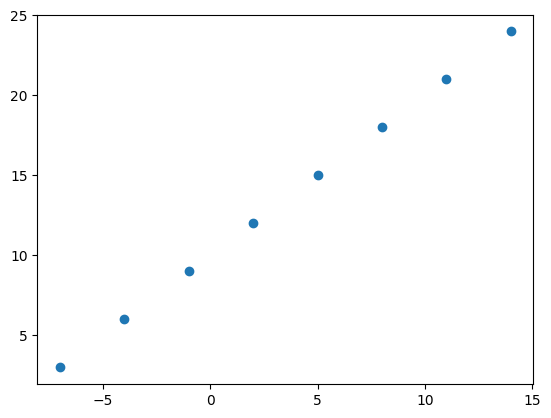

In [12]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and the output layers, as well as the hidden layers of deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the pattern its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels)

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,  # mae is short for mean absolute error
    optimizer=tf.keras.optimizers.SGD(),  # SGD stands for stochastic gradient decent
    metrics=["mae"]
    )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 19.4248 - mae: 19.4248
Epoch 2/5
1/1 [==============================] - 0s 36ms/step - loss: 19.1435 - mae: 19.1435
Epoch 3/5
1/1 [==============================] - 0s 35ms/step - loss: 18.8623 - mae: 18.8623
Epoch 4/5
1/1 [==============================] - 0s 31ms/step - loss: 18.5810 - mae: 18.5810
Epoch 5/5
1/1 [==============================] - 0s 24ms/step - loss: 18.2998 - mae: 18.2998


In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 1s 547ms/step


array([[-17.113503]], dtype=float32)

In [16]:
y_pred + 14

array([[-3.1135025]], dtype=float32)

## Improving Our Model

We can improve our model by altering the steps we used to create a model

1.  **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting the model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the modelmore examples to learn from)

In [17]:
# 1st HYPERPARAMETER TWEAK --> EPOCHS

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,  # mae stands for mean absolute error
    optimizer=tf.keras.optimizers.SGD(),  # SGD stands for stochastic gradient decent
    metrics=["mae"]
)

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 8.2938 - mae: 8.2938
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 8.1613 - mae: 8.1613
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 8.0288 - mae: 8.0288
Epoch 4/100
1/1 [==============================] - 0s 35ms/step - loss: 7.8963 - mae: 7.8963
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 7.7638 - mae: 7.7638
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 7.6313 - mae: 7.6313
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 7.4988 - mae: 7.4988
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 7.4475 - mae: 7.4475
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 7.4419 - mae: 7.4419
Epoch 10/100
1/1 [==============================] - 0s 43ms/step - loss: 7.4362 - mae: 7.4362
Epoch 11/100
1/1 [==============================] - 0s 15ms/step - loss

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our models prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 204ms/step


array([[30.219854]], dtype=float32)

In [20]:
# 2nd HYPERPARAMETER TWEAK --> OPTIMIZER

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["mae"]
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 484ms/step - loss: 17.9387 - mae: 17.9387
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 17.9381 - mae: 17.9381
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 17.9375 - mae: 17.9375
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 17.9369 - mae: 17.9369
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 17.9363 - mae: 17.9363
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 17.9357 - mae: 17.9357
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 17.9351 - mae: 17.9351
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 17.9345 - mae: 17.9345
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 17.9339 - mae: 17.9339
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 17.9333 - mae: 17.9333
Epoch 11/100
1/1 [==============================

In [21]:
model.predict([17.0])

1/1 [==============================] - 0s 86ms/step


array([[-16.621492]], dtype=float32)

In [22]:
# FINAL TWEAKS

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=["mae"]
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 629ms/step - loss: 13.1284 - mae: 13.1284
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0620 - mae: 13.0620
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9956 - mae: 12.9956
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 12.9292 - mae: 12.9292
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 12.8629 - mae: 12.8629
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 12.7965 - mae: 12.7965
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 12.7301 - mae: 12.7301
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 12.6638 - mae: 12.6638
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 12.5974 - mae: 12.5974
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 12.5310 - mae: 12.5310
Epoch 11/100
1/1 [==============================

In [23]:
model.predict([17.0])

1/1 [==============================] - 0s 72ms/step


array([[32.044445]], dtype=float32)

## Common Ways to Improve A Deep Model:



*   Adding layers
*   Increase the number of hidden units
*   Change the activation functions
*   Change the optimization function
*   Change the learning rate (potentially the most important hyperparameter of many different neural networks)
*   Fitting on more data
*   Fitting for longer



## Evaluating a Model

In practice, a typical workflow you'll go through when building neural networks is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize."

it's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does the model perform while it learns?
* The predictions of the model - how do the predictions of the model line up with the ground truth (the original labels)?

In [24]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

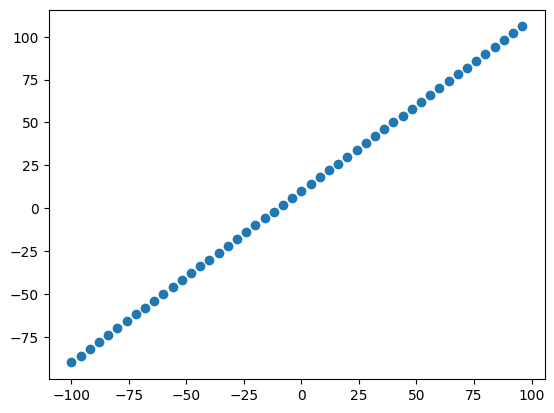

In [26]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* ***Training set*** - the model learns from this data, which is typically 70-80% if the total data you have available.
* ***Validation set*** - the model gets tuned on this data, which is typically 10-15% of the data available.
* ***Test set*** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% if the total available data.

In [27]:
# Check the length of how many samples we have
len(X)

50

In [28]:
# Split the data into train and test sets
X_train = X[:40]  # First 40 are training samples (80%)
y_train = y[:40]

X_test = X[40:]  # Last 10 are the test samples (20%)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets...let's visualize it again!

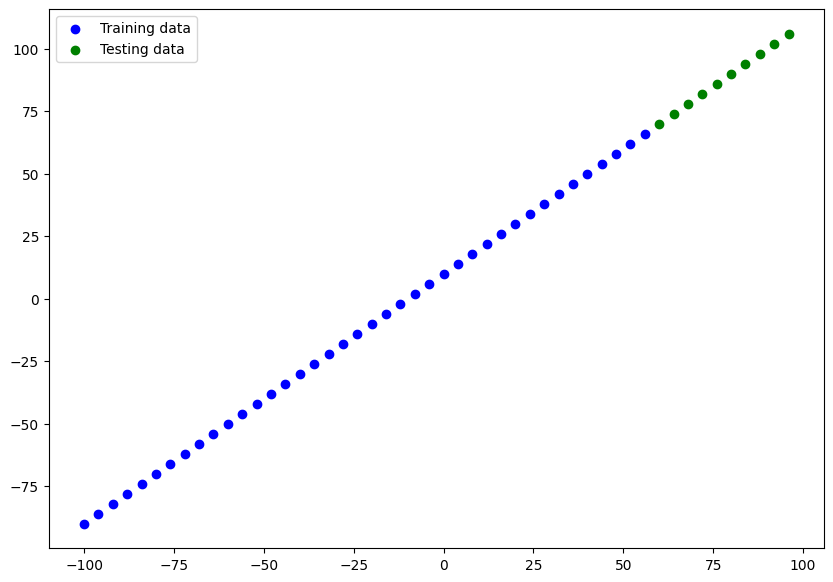

In [29]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to be able to predict this (given X, what's y?)
# Show a legend
plt.legend();

In [30]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [31]:
# model.summary()

In [32]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [33]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://youtu.be/njKP3FqW3Sk).

🛠 **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [35]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [36]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


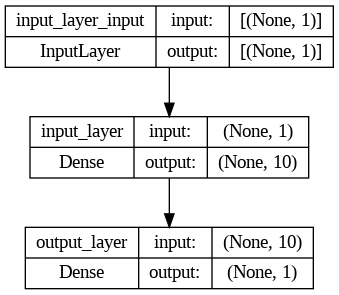

In [37]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [38]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 64ms/step


array([[35.03069 ],
       [37.27062 ],
       [39.510555],
       [41.750492],
       [43.990425],
       [46.230362],
       [48.4703  ],
       [50.71023 ],
       [52.95017 ],
       [55.1901  ]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [40]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

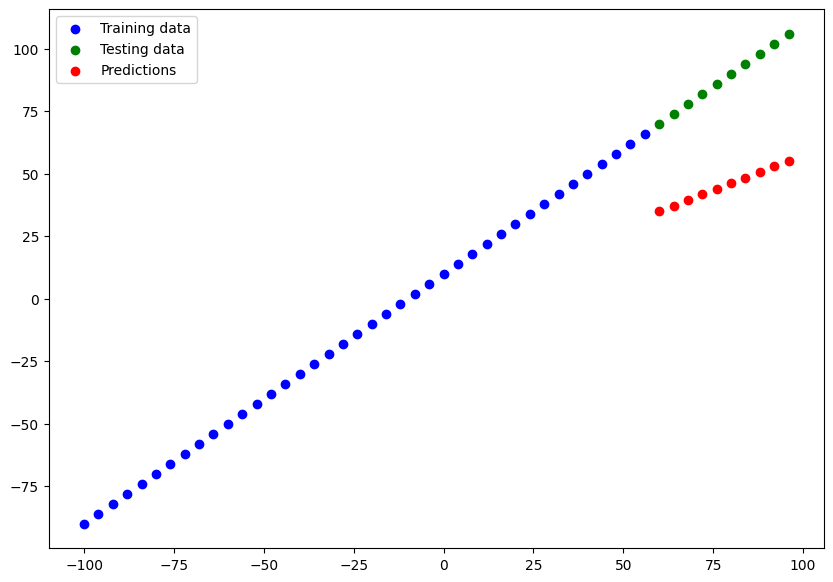

In [41]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [42]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 254ms/step - loss: 42.8896 - mae: 42.8896


[42.88960647583008, 42.88960647583008]

In [43]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([52.96931 , 50.72938 , 48.489445, 46.249508, 44.009575, 41.769638,
       39.5297  , 37.28977 , 35.04983 , 32.8099  ], dtype=float32)>

In [44]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[35.03069 ],
       [37.27062 ],
       [39.510555],
       [41.750492],
       [43.990425],
       [46.230362],
       [48.4703  ],
       [50.71023 ],
       [52.95017 ],
       [55.1901  ]], dtype=float32)>

In [45]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [46]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([35.03069 , 37.27062 , 39.510555, 41.750492, 43.990425, 46.230362,
       48.4703  , 50.71023 , 52.95017 , 55.1901  ], dtype=float32)>

In [47]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=42.889606>

In [48]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(
    y_true=y_test,
    y_pred=tf.squeeze(y_pred)
)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1865.0754>

In [56]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running Experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it....
```
1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data


Let's do 3 modeling experiments:
1. `model_1` - same as original model, 1 layer trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

** Build `model_1`**

In [75]:
# Set random see (for reproducibility)
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 98.7181 - mae: 98.7181
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 63.2627 - mae: 63.2627
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 26.1288 - mae: 26.1288
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 11.4294 - mae: 11.4294
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 12.7093 - mae: 12.7093
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.8354 - mae: 9.8354
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.9130 - mae: 8.9130
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1003 - mae: 9.1003
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.5560 - mae: 19.5560
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.5819 - mae: 10.5819
Epoch 11/100
2/2 [==============================] - 0s 7ms/step

1/1 [==============================] - 0s 51ms/step


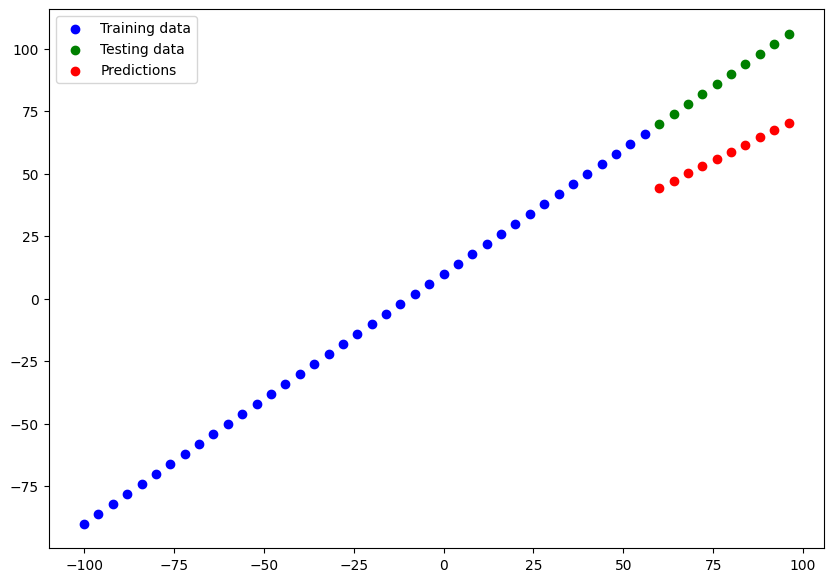

In [76]:
# Make and plot predictions with model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [77]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.646778>,
 <tf.Tensor: shape=(), dtype=float32, numpy=949.6465>)

**Build `model_2`**
* 2 Dense layers, trained for 100 epochs


In [ ]:
# Set random see (for reproducibility)
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

1/1 [==============================] - 0s 136ms/step


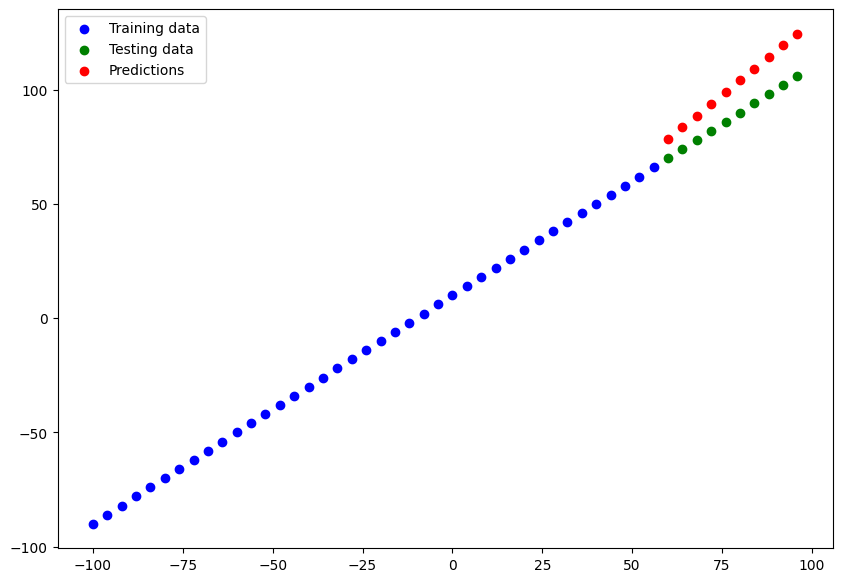

In [79]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [80]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.476198>,
 <tf.Tensor: shape=(), dtype=float32, numpy=191.80743>)

**Build `model_3`**
* 2 layers, trained for 500 epochs


In [ ]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)


1/1 [==============================] - 0s 62ms/step


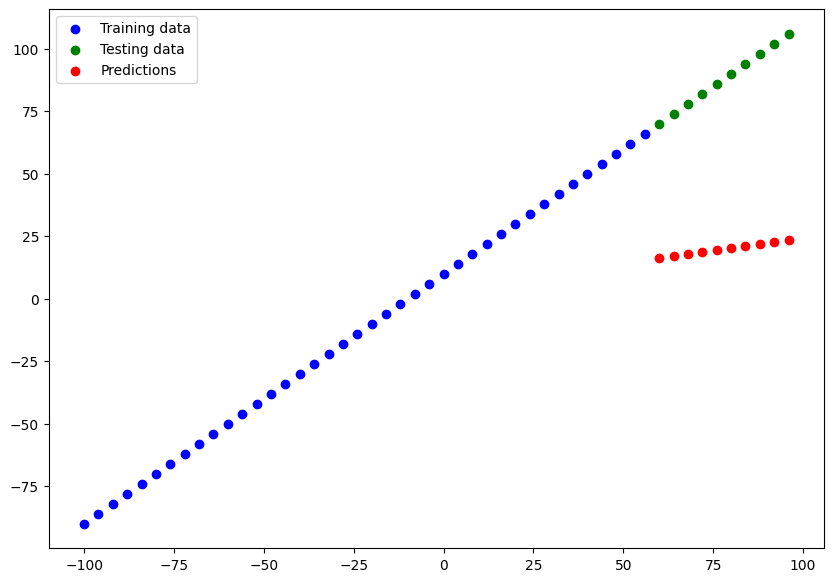

In [82]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [83]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.00791>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4709.95>)

🔑**NOTE:** You want to start with small experiments (small models) and make sure they work, and then increase the scale when needed.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.


In [87]:
# Let's compare our models results using a pandas dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.646778,949.646484
1,model_2,13.476198,191.807434
2,model_3,68.007912,4709.950195


Looks like `model_2` performed the best...

In [88]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                20        
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑**NOTE:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖**Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of google colab or wherever they were trained, such as a web application or a mobile app.

There are 2 main formats we can save our model to:
1. The SaveModel format
2. The HDF5 format

In [90]:
# Save model using the SaveModel format
model_2.save("best_model_SavedModel_format")

In [92]:
# Save model in HDF5 format
model_2.save("best_model_HDF5_format.hdf5")